⏳ Chargement des données depuis : ../01-Healthcare-Life-Sciences/Heart_Disease_Prediction.csv ...
✅ Fichier chargé avec succès ! (Taille : (270, 14))

⚙️ Transformation de la cible (Presence=1, Absence=0) pour les calculs mathématiques...


C:\Users\ASUS\AppData\Local\Temp\ipykernel_36364\865089513.py:53: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


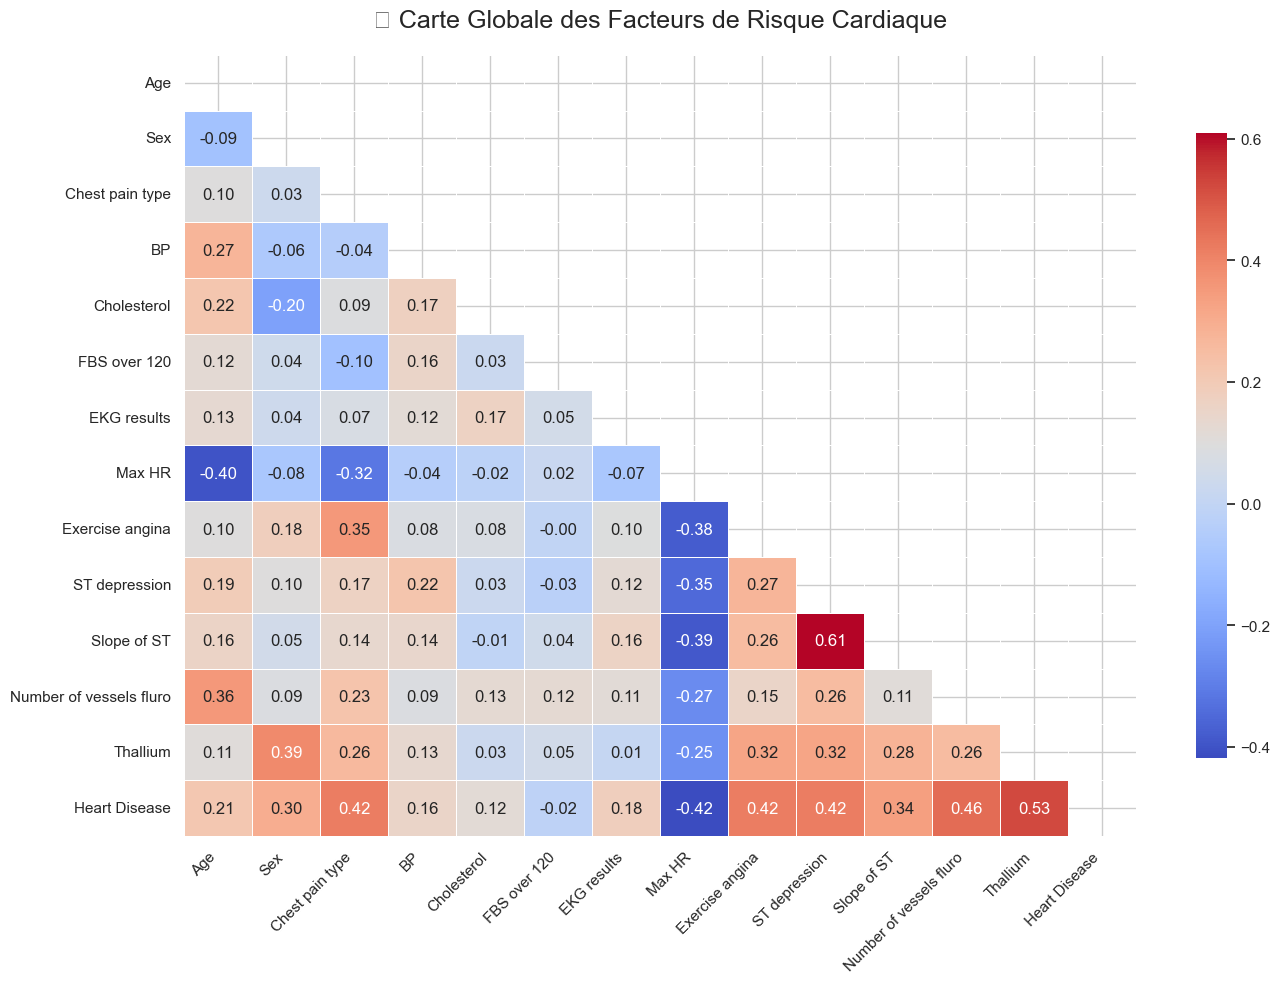

❌ Erreur lors de l'exécution : Could not interpret value `Depression_ST` for `x`. An entry with this name does not appear in `data`.


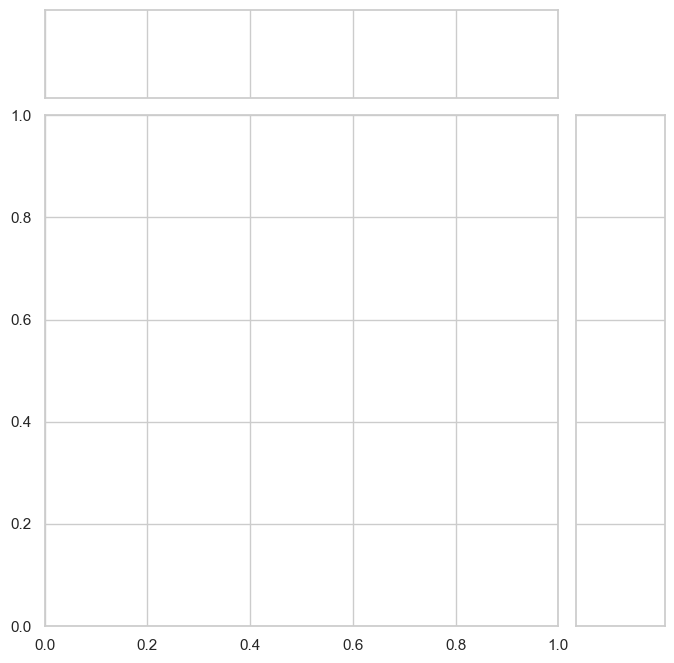

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuration du style visuel
sns.set_theme(style="whitegrid")

# Chemin dynamique adaptatif (Git-Ready)
if os.path.exists("01-Healthcare-Life-Sciences/Heart_Disease_Prediction.csv"):
    file_path = "01-Healthcare-Life-Sciences/Heart_Disease_Prediction.csv"
elif os.path.exists("../01-Healthcare-Life-Sciences/Heart_Disease_Prediction.csv"):
    file_path = "../01-Healthcare-Life-Sciences/Heart_Disease_Prediction.csv"
else:
    file_path = "Heart_Disease_Prediction.csv"

if os.path.exists(file_path):
    try:
        print(f"⏳ Chargement des données depuis : {file_path} ...")
        df = pd.read_csv(file_path)
        print(f"✅ Fichier chargé avec succès ! (Taille : {df.shape})\n")

        # ==========================================
        # 1. PRÉPARATION DES DONNÉES
        # ==========================================
        print("⚙️ Transformation de la cible (Presence=1, Absence=0) pour les calculs mathématiques...")
        # ÉTAPE CRITIQUE : Transformation du texte en numérique pour la corrélation
        df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

        # ==========================================
        # 2. VUE GLOBALE : MATRICE DE CORRÉLATION
        # ==========================================
        # On ne garde que les colonnes numériques
        corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

        # Le masque "Expert" pour cacher le triangle supérieur redondant
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

        plt.figure(figsize=(14, 10))
        
        # cmap='coolwarm' : Rouge = Danger (Corrélation positive), Bleu = Protection (Négative)
        sns.heatmap(corr_matrix, 
                    mask=mask, 
                    annot=True, 
                    fmt=".2f", 
                    cmap='coolwarm', 
                    linewidths=0.5, 
                    cbar_kws={"shrink": .8})

        plt.title("🔥 Carte Globale des Facteurs de Risque Cardiaque", fontsize=18, pad=20)
        plt.xticks(rotation=45, ha='right') # Rotation pour que les labels soient lisibles
        plt.tight_layout()
        plt.show()

        # ==========================================
        # 3. VUE DÉTAILLÉE : ANALYSE CONJOINTE
        # ==========================================
        # Utilisation d'une palette Set1 (Rouge/Bleu) idéale pour du diagnostic (Présent/Absent)
        jp = sns.jointplot(data=df, x='Depression_ST', y='Slope', hue='Heart Disease', height=8, palette="Set1")
        
        # Correction de pro : Ajouter un titre à un jointplot
        jp.fig.suptitle("Analyse conjointe : Dépression ST vs Pente (Slope)", y=1.02, fontsize=16)
        plt.show()

    except Exception as e:
        print(f"❌ Erreur lors de l'exécution : {e}")
else:
    print("❌ Erreur : Impossible de trouver le fichier 'Heart_Disease_Prediction.csv'. Vérifie l'arborescence.")

🔥 Calcul des corrélations en cours...


C:\Users\ASUS\AppData\Local\Temp\ipykernel_36364\2723055778.py:34: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


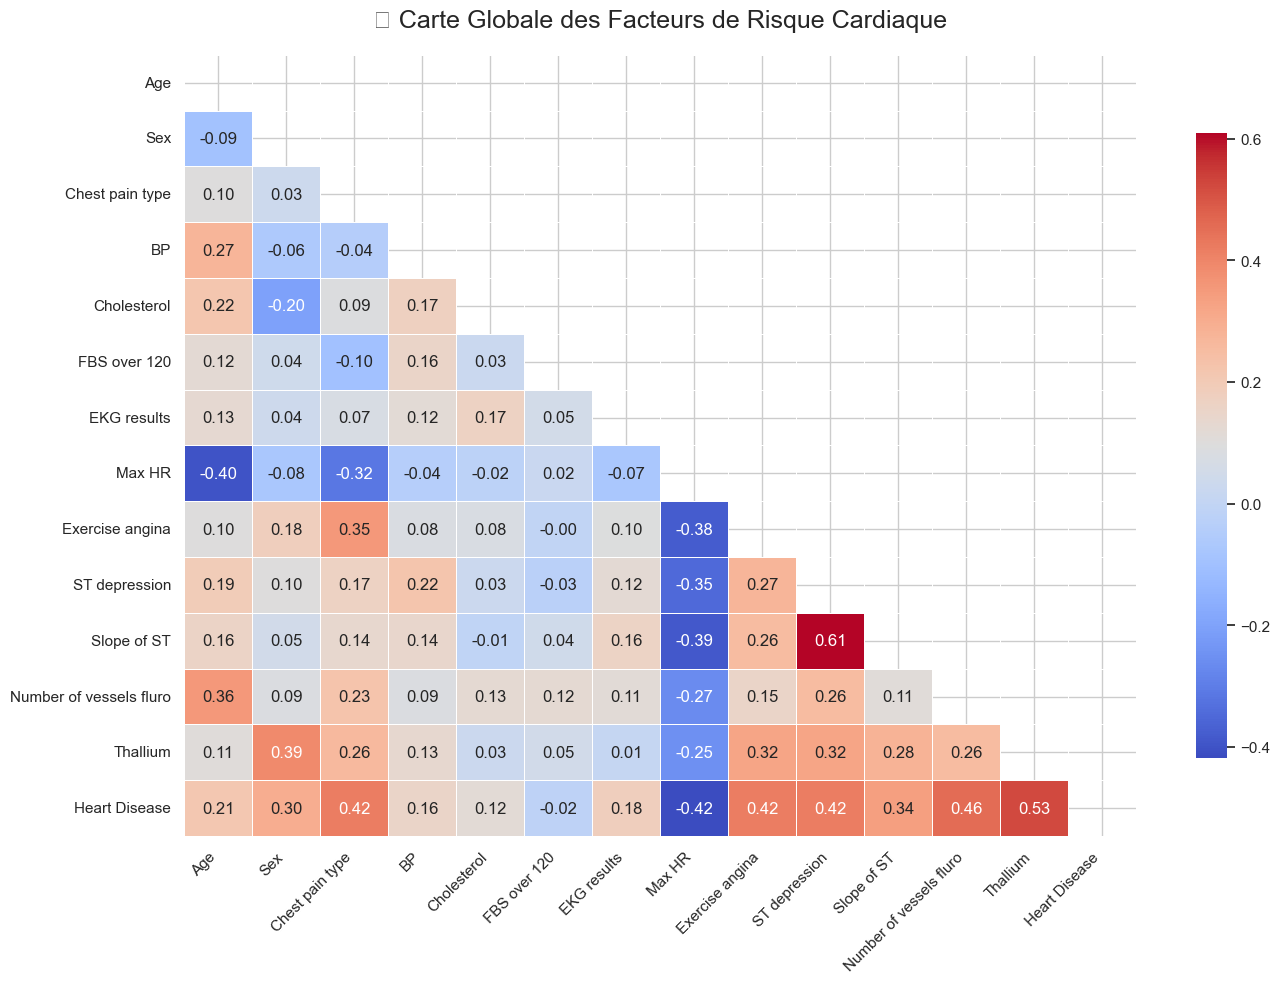

❌ Erreur : Could not interpret value `Depression_ST` for `x`. An entry with this name does not appear in `data`.


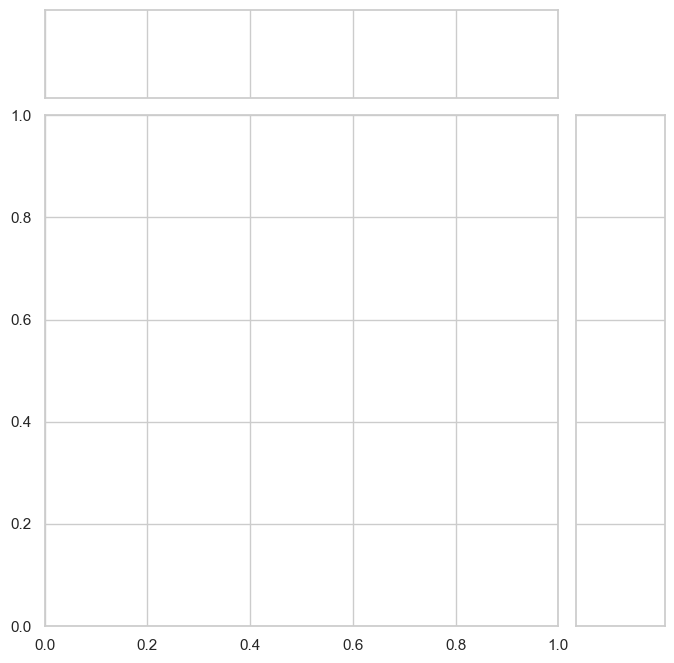

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Remplacer par le bon chemin si besoin
file_path = "Heart_Disease_Prediction.csv" 

try:
    print("🔥 Calcul des corrélations en cours...")
    df = pd.read_csv(file_path)

    # ÉTAPE CRITIQUE : Transformation en chiffres
    df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

    # --- CRÉATION DE LA MATRICE DE CORRÉLATION ---
    corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

    # --- LE DESIGN "EXPERT" (Le Masque) ---
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # --- LE DESSIN (HEATMAP) ---
    plt.figure(figsize=(14, 10))
    heatmap = sns.heatmap(corr_matrix, 
                          mask=mask, 
                          annot=True,      
                          fmt=".2f",       
                          cmap='coolwarm', 
                          linewidths=0.5,  
                          cbar_kws={"shrink": .8}) 

    plt.title("🔥 Carte Globale des Facteurs de Risque Cardiaque", fontsize=18, pad=20)
    plt.xticks(rotation=45, ha='right') 
    plt.tight_layout()
    plt.show()

    # --- ANALYSE CONJOINTE (JOINTPLOT) ---
    jp = sns.jointplot(data=df, x='Depression_ST', y='Slope', hue='Heart Disease', palette='coolwarm', height=8)
    jp.fig.suptitle("Analyse conjointe : Dépression ST vs Slope", y=1.02, fontsize=16)
    plt.show()

except Exception as e:
    print(f"❌ Erreur : {e}")